Import and declare variables

In [1]:
import subprocess
import os

data_root = "../../data"

reference_genome = f"{data_root}/hg19.fasta"
reference_genome_dict = f"{data_root}/hg19.dict"
reference_genome_fai = f"{data_root}/hg19.fai"
input_bam = f"{data_root}/DataBreastCancerPatients/R129_Seq137.bam"
targeted_vcf = f"{data_root}/R129_Seq137.vcf"

if not os.path.isfile(reference_genome):
    raise FileNotFoundError("reference genome is missing, add it please")
if not os.path.isfile(input_bam):
    raise FileNotFoundError("patient input bam file is missing, add it please")

In [2]:
if not os.path.isfile(reference_genome_fai):
    subprocess.run([f"samtools faidx {reference_genome}"], shell=True)

Create dict file required for VCF file generation

In [3]:
if not os.path.isfile(reference_genome_dict):
    subprocess.call([f"gatk CreateSequenceDictionary -R {reference_genome} -O {reference_genome_dict}"], shell=True)

Indexing the input bam file

In [4]:
subprocess.run([f"samtools index {input_bam}"], shell=True)

CompletedProcess(args=['samtools index ../../data/DataBreastCancerPatients/R129_Seq137.bam'], returncode=0)

In [5]:
subprocess.call([f"gatk HaplotypeCaller -R {reference_genome} -I {input_bam} -O {targeted_vcf} -L ../../data/location.bed"], shell=True)

Using GATK jar /Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar HaplotypeCaller -R ../../data/hg19.fasta -I ../../data/DataBreastCancerPatients/R129_Seq137.bam -O ../../data/R129_Seq137.vcf -L ../../data/location.bed
23:19:34.334 INFO  NativeLibraryLoader - Loading libgkl_compression.dylib from jar:file:/Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.dylib
23:19:34.514 INFO  HaplotypeCaller - ------------------------------------------------------------
23:19:34.518 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.4.0.0
23:19:34.518 INFO  HaplotypeCaller - For suppo

0

Show chromosome spreading

   CHROM       POS ID REF ALT   QUAL FILTER  \
0  chr13  32893180  .  GT   G  584.6      .   
1  chr13  32899399  .  AT   A  126.6      .   
2  chr13  32900363  .  CT   C  420.6      .   
3  chr13  32900440  .  AT   A   83.6      .   
4  chr13  32903635  .  TA   T  913.6      .   

                                                INFO          FORMAT  \
0  AC=1;AF=0.500;AN=2;BaseQRankSum=-3.290;DP=88;E...  GT:AD:DP:GQ:PL   
1  AC=1;AF=0.500;AN=2;BaseQRankSum=-2.871;DP=97;E...  GT:AD:DP:GQ:PL   
2  AC=1;AF=0.500;AN=2;BaseQRankSum=-3.552;DP=97;E...  GT:AD:DP:GQ:PL   
3  AC=1;AF=0.500;AN=2;BaseQRankSum=-2.557;DP=90;E...  GT:AD:DP:GQ:PL   
4  AC=1;AF=0.500;AN=2;BaseQRankSum=-4.762;DP=94;E...  GT:AD:DP:GQ:PL   

                     23_R_119  
0  0/1:63,25:88:99:592,0,2024  
1  0/1:84,13:97:99:134,0,2363  
2  0/1:71,25:96:99:428,0,1862  
3   0/1:78,11:89:91:91,0,2256  
4  0/1:51,43:94:99:921,0,1541  


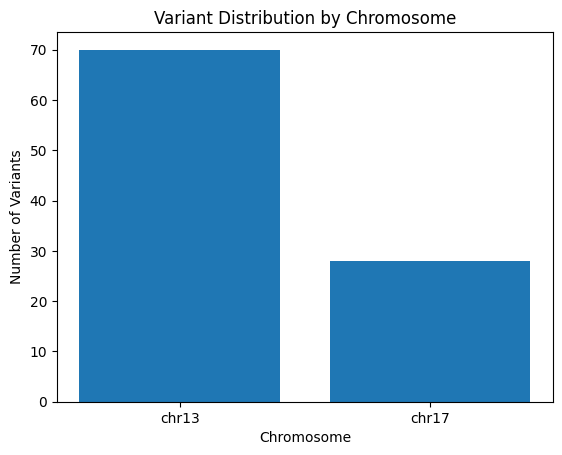

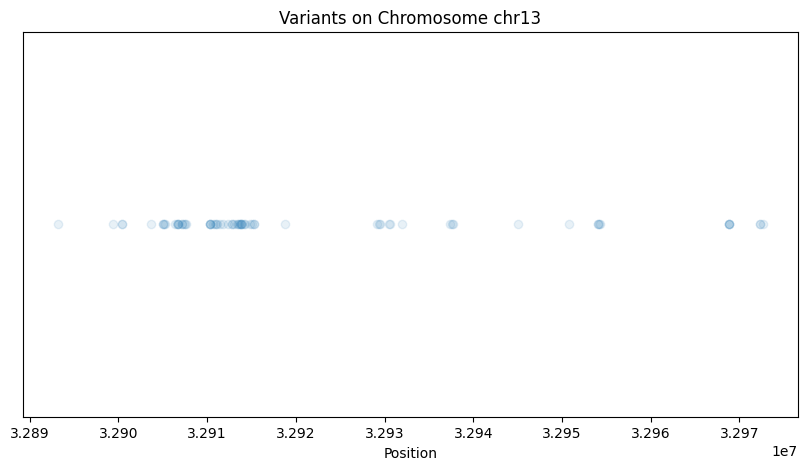

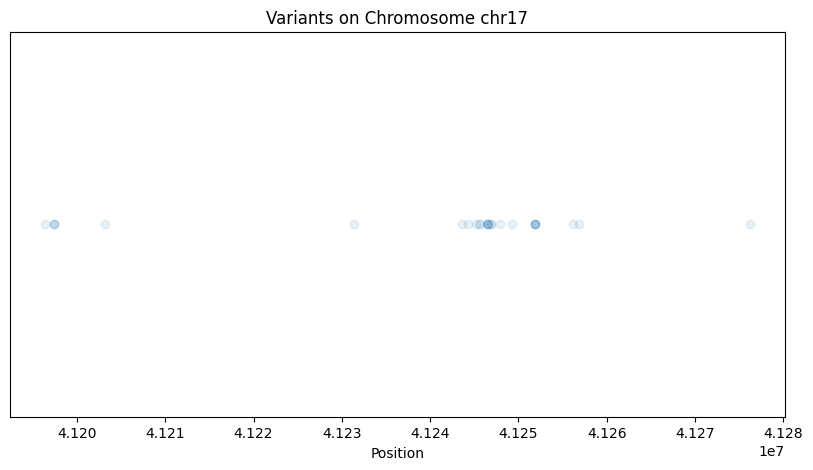

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by chromosome and count the number of variants
# Define the column names
col_names = ['CHROM','POS','ID','REF','ALT','QUAL','FILTER','INFO','FORMAT','23_R_119']

# Load the VCF file
df = pd.read_csv(targeted_vcf, comment='#', sep='\t', names=col_names)

# View the first few rows
print(df.head())

variant_counts = df['CHROM'].value_counts()

# Create a bar plot of the variant counts
plt.bar(variant_counts.index, variant_counts.values)
plt.xlabel('Chromosome')
plt.ylabel('Number of Variants')
plt.title('Variant Distribution by Chromosome')
plt.show()

chromosomes = df['CHROM'].unique()

# For each chromosome
for chrom in chromosomes:
    # Filter the DataFrame for only rows corresponding to this chromosome
    df_chrom = df[df['CHROM'] == chrom]

    # Generate the plot for this chromosome
    plt.figure(figsize=(10, 5))
    plt.scatter(df_chrom['POS'], [1]*len(df_chrom), alpha=0.1)
    plt.yticks([])
    plt.title('Variants on Chromosome {}'.format(chrom))
    plt.xlabel('Position')
    plt.show()